# Diffusion Maps + TDA

In this module, we will explore how nonlinear dimension reduction (NLDR) can complement TDA tools.  

In [1]:
import numpy as np
%matplotlib notebook
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from matplotlib.offsetbox import OffsetImage, AnnotationBbox
from ripser import ripser
from persim import plot_diagrams
from DiffusionMaps import *

We will now setup a "pinched circle" shape which we will use as an example.  Perhaps we are just interested in the fact that it's a topological loop, in which case we don't want to accidentally confuse it for a Figure 8 (which it is close to).  In this case, diffusion maps can help take care of the extrinsic embedding.

<IPython.core.display.Javascript object>


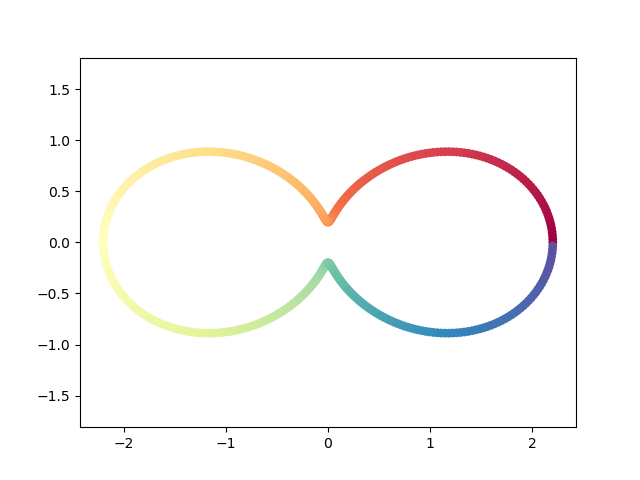

In [2]:
def getPinchedCircle(N):
    t = np.linspace(0, 2*np.pi, N+1)[0:N]
    x = np.zeros((N, 2))
    x[:, 0] = (1.2 + np.cos(2*t))*np.cos(t)
    x[:, 1] = (1.2 + np.cos(2*t))*np.sin(t)
    return x

plt.figure()
N = 400
X = getPinchedCircle(N)
plt.scatter(X[:, 0], X[:, 1], 40, np.arange(N), cmap = 'Spectral', edgecolor = 'none')
plt.axis('equal')
plt.show()

<IPython.core.display.Javascript object>


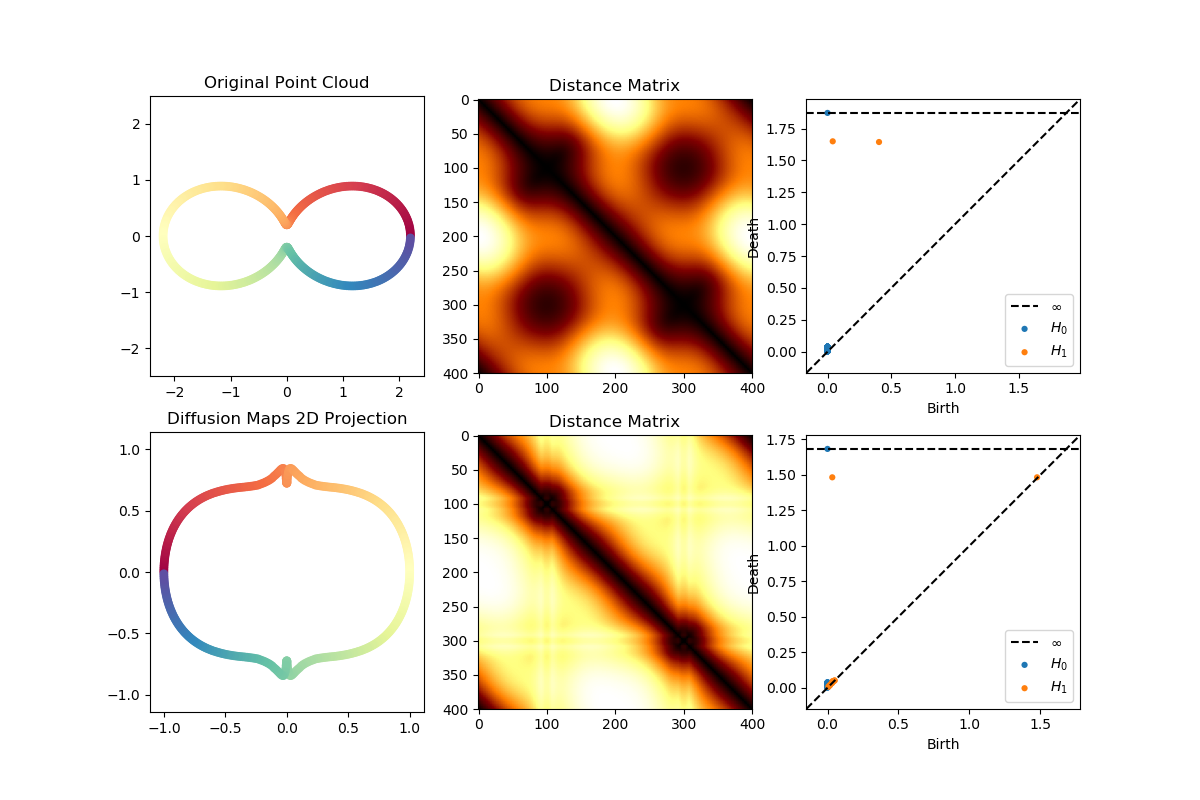

In [3]:
N = 400
XOrig = getPinchedCircle(N)
SSMOrig = getSSM(XOrig)
Kappa = 0.05
t = 200

dgms1 = ripser(XOrig)['dgms']
M = getDiffusionMap(SSMOrig, Kappa, t)
M = M/np.abs(np.max(M))
dgms2 = ripser(M)['dgms']
SSM = getSSM(M)
X = M[:, [-2, -3]]

dgms1[1] += 0.01*np.random.randn(dgms1[1].shape[0], 2)

plt.figure(figsize=(12, 8))
plt.subplot(231)
plt.scatter(XOrig[:, 0], XOrig[:, 1], 40, np.arange(N), cmap = 'Spectral', edgecolor = 'none')
plt.title("Original Point Cloud")
plt.axis('equal')
plt.subplot(232)
plt.imshow(SSMOrig, interpolation = 'nearest', cmap = 'afmhot')
plt.title("Distance Matrix")
plt.subplot(233)
plot_diagrams(dgms1)
plt.subplot(234)
plt.scatter(X[:, 0], X[:, 1], 40, np.arange(N), cmap = 'Spectral', edgecolor = 'none')
plt.title("Diffusion Maps 2D Projection")
plt.axis('equal')
plt.subplot(235)
plt.imshow(SSM, interpolation = 'nearest', cmap = 'afmhot')
plt.title("Distance Matrix")
plt.subplot(236)
plot_diagrams(dgms2)

plt.show()